# Исследовательский анализ данных и выделение групп пользователей на основе поведения клиентов мобильного приложения.

# Материалы:
Презентация : <https://disk.yandex.ru/i/yc3Pqp2kgZfVcA>


Дашборд: <https://public.tableau.com/app/profile/anna6845/viz/Mobileapp_16844805973700/Dashboard1?publish=yes>

Заказчик исследования — отдел маркетинга мобильного приложения "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений
Цель заказчика- с помощью сегментации пользователей улучшить приложение, а именно: 
1. Адаптировать приложение под целевую и смежные аудитории.
2. Получить на основании сегментации гипотезы как можно улучшить приложения, основываясь на пользовательском опыте.

 В ходе исследования мы:
 
- Изучим общую информацию.
- Проведем предобработку данных.
- Проведем исследовательский анализ данных. (Рассчитаем коэффициент удержания пользователей, конверсию в целевое действие contacts_show, время проведённое в приложении, частоту совершения событий).
- Проведем сегментацию пользователей.
- Проверим гипотезы.

Описание данных:


В нашем распоряжении данные, о событиях, совершенных в мобильном приложении "Ненужные вещи". В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.


Датасет **mobile_dataset.csv** содержит колонки:
- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Расшифровки событий:
- `advert_open` — открытие карточки объявления
- `photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

### Загрузим данные и изучим общую информацию.

#### Импортируем библиотеки. Считаем данные из csv-файлов и сохраним в переменные  `mobile_sourсes` и `mobile_dataset` . Выведем общую информацию о файлах.



In [43]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
import numpy as np
import math as mth

In [44]:
mobile_sourсes = pd.read_csv('mobile_soures.csv')
mobile_sourсes

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


In [45]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [46]:
mobile_dataset = pd.read_csv('mobile_dataset.csv')
mobile_dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [47]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


В исследуемых данных представлена информация о 4293 пользователях. В таблицах встречаются столбцы с значениями типа object.

###  Предобработка данных.

#### Преобразуем данные в нужные типы.

В таблице `mobile_dataset` в столбце *event.time* содержится информация о дате и времени события. Необходимо привести данные столбец к типу *datetime*.

In [48]:
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time'], format='%Y-%m-%d %H:%M:%S')

#### Проверим данные  типы на наличие  пропусков.

In [49]:
mobile_dataset.isna().sum()

event.time    0
event.name    0
user.id       0
dtype: int64

In [50]:
mobile_sourсes.isna().sum()

userId    0
source    0
dtype: int64

В исследуемых данный пропуски отсутствуют.

#### Проверим данные на дубликаты.

In [51]:
print('Количество явных дубликатов в таблицу mobile_dataset:', mobile_dataset.duplicated().sum())
print('Количество явных дубликатов в таблицу mobile_sourсes:', mobile_sourсes.duplicated().sum())

Количество явных дубликатов в таблицу mobile_dataset: 0
Количество явных дубликатов в таблицу mobile_sourсes: 0


В представленний данных отсутствуют явные дубликаты.

В таблице **mobile_dataset** в столбце *event.name* содержится информация о наименовании события. Названия **contacts_show и show_contacts** имеют одинаковую расшифровку - пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления. Изменим все значения с именем **show_contacts** для удобства в дальнейшем анализе.

In [52]:
mobile_dataset = mobile_dataset.replace('show_contacts', 'contacts_show')

#### Добавим необходимые столбцы для дальнейшего анализа

In [53]:
#столбец с датой события
mobile_dataset['event.date'] = mobile_dataset['event.time'].dt.date
#столбец с информацией о часе события
mobile_dataset['hour'] = mobile_dataset['event.time'].dt.hour
#столбец с порядковым номером дня недели
mobile_dataset['weekday'] = mobile_dataset['event.time'].dt.weekday

#### Переименование столбцов.

В таблице **mobile_sourсes** переименуем столбец userId, это необходимо для последующего объединения таблиц

In [54]:
mobile_sourсes = mobile_sourсes.rename(columns = {'userId':'user.id'})

В нашем распоряжении два датасета. Первый хранит информацию  об источнике, с которого пользователь установили приложение 4932 уникальных пользователя. Второй о 74197 событиях, которые эти пользователи совершили. В данном разделе мы проверили и выяснили, что явные дубликаты и пропуски отсутствуют. Обнаружили скрытые дубликаты в столбце с наименованием события и привели их в одинаковым расшифровкам. Привели в соответствие тип данных в столбце даты. Добавили новые столбцы с информацией о дне недели и часе совершения события, которые потребуются нам в дальнейшем анализе. Изменили название столбца, для удобства последующего объединения таблиц.

### Исследовательский анализ данных по общему поведению пользователей.
#### Проанализируем показатель Retention Rate.

In [55]:
#создадим профиль пользователя id- первое посещение
profiles = (
             mobile_dataset
                          .groupby('user.id')['event.time'].min()
                          .reset_index()  
                          .rename(columns={'event.time': 'first.time'})
             )

profiles['first.date'] = profiles['first.time'].dt.date

profiles

,user.id,first.time,first.date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,2019-10-18
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,2019-10-25
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,2019-10-13
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,2019-10-07
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,2019-10-23
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33.867145,2019-10-21


In [56]:
#создадим функцию для расчета удержания
def get_retention(
    profiles, sessions, dimensions=[]
):
    # собираем «сырые» данные для расчёта удержания
    result_raw = profiles.merge(
        sessions[['user.id', 'event.time']], on='user.id', how='left'
    )
    
    # вычисляем лайфтайм каждой сессии в днях
    result_raw['lifetime'] = (result_raw['event.time'] - result_raw['first.time']).dt.days
    
    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user.id', aggfunc='nunique'
    )
    # вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user.id': 'nunique'})
        .rename(columns={'user.id': 'cohort_size'})
    )
    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    )
    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)
    return result_raw, result_grouped


In [57]:
#используем функцию  get_retention
retention_raw, retention = get_retention(
    profiles, mobile_dataset, dimensions=['first.date']
)

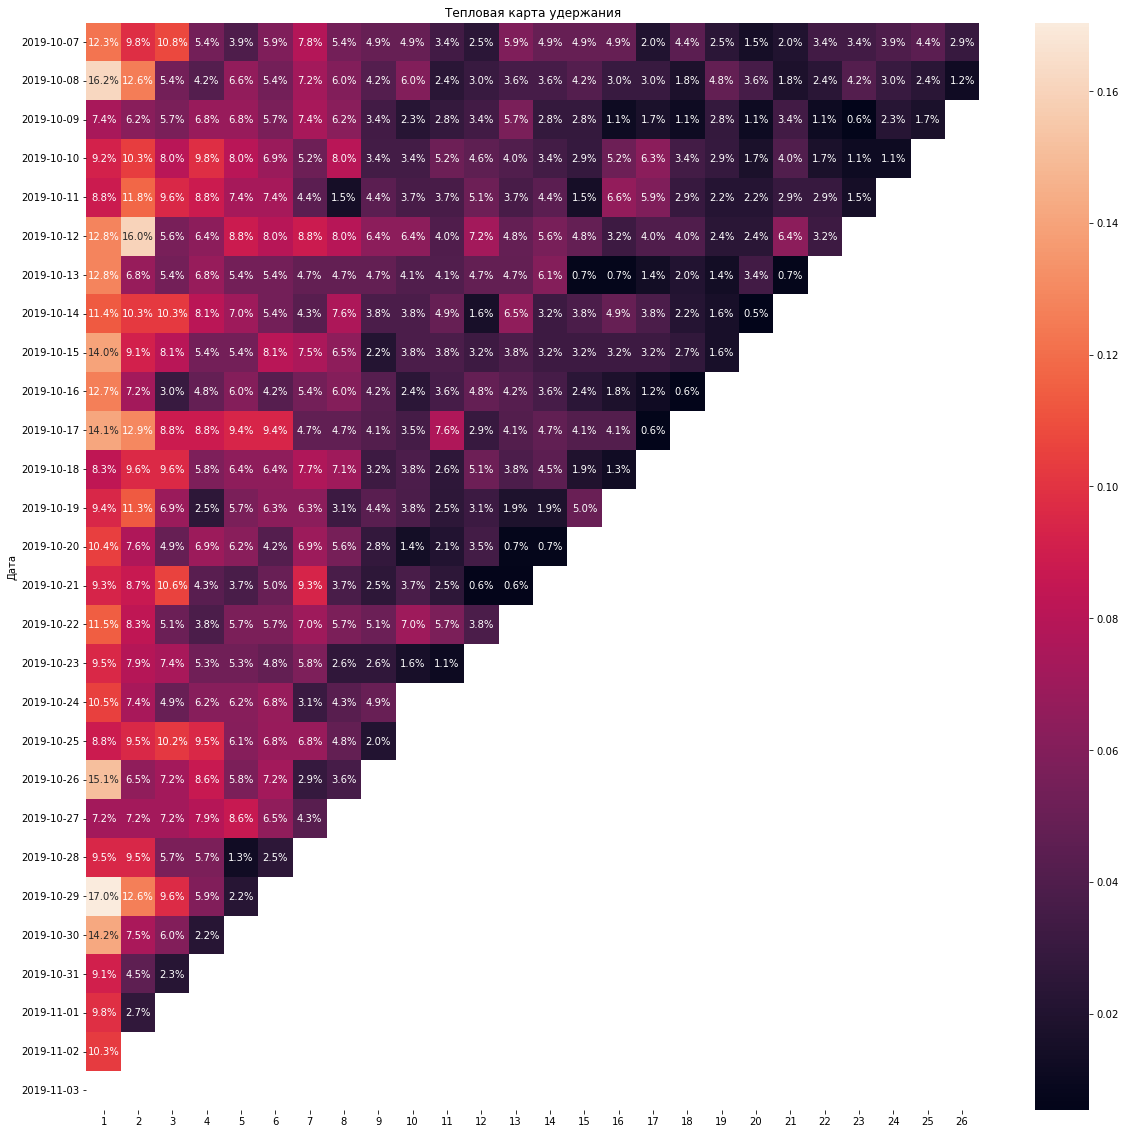

In [58]:
#построим тепловую карту
plt.figure(figsize=(20, 20))# задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.1%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.figsize=(30,30)
plt.ylabel('Дата')
plt.show()

На основании графика можно наблюдать случаи, когда в один из дней приложением пользовалось мало клиентов, но на следующий день показатель удержания  снова возрастал. Однозначно можно сказать, что такая тенденция не связана с днем недели (будни/выходной). Возможно клиент терял заинтересованность в поиске, либо просто забывал о своих намерениях. Стоит рассмотреть вопрос о возможности рассылки пуш-уведомлений с напоминанием о недавнем поиске определенного товара клиентам, которые не заходили какой-то период времени в приложение или добавили товары в избранное, но не перешли на карточку просмотра номера телефона.
Так же можно сделать вывод, что после 7-10 дней пользователи меньше заходят в приложение, возможно недели достаточно для поиска и покупки необходимых вещей, стоит стимулировать клиентов на новые поиски за счет таргет объявлений.

#### Проанализируем время, проведенное пользователем  в приложении.

##### Определим границы сессий.

Одной сессией будем считать период времени, когда человек пользовался приложением без перерыва более чем на 30 минут. Обычно,если пользователь не проявляет активность в приложении более долгое время, то скорее всего он переключился на другое действия и забыл о первоначальной намерение поиска. Интервал менее 30 минут брать так же не стоит, так как пользователь мог отвлечься на мелкие задачи и снова вернуться к поиску. Так же по дефолту в гугл аналитика или Яндекс метрика тайм аут сессии 30 мин.


In [59]:
#отсортируем данные по пользователем и времени
df = mobile_dataset.sort_values(['user.id', 'event.time']) 
#определим разницу 30 минут для каждой группы с кумулятивной суммой
g = (df.groupby('user.id')['event.time'].diff() > pd.Timedelta('30Min')).cumsum()
#создадим счетчик групп
df['session'] = df.groupby(['user.id', g], sort=False).ngroup() + 1
df

,event.time,event.name,user.id,event.date,hour,weekday,session
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,0,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,0,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,0,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,0,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,13,0,1
...,...,...,...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,15,6,10368
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,15,6,10368
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,16,6,10368
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,16,6,10368


##### Проанализируем количество сессий.

In [60]:
print('Количество сессий:', df['session'].nunique())

Количество сессий: 10368


In [61]:
#сгруппируем данные по пользователям и посчитаем количество сессий у каждого
count_sessions = df.groupby('user.id')['session'].nunique().reset_index()
count_sessions['session'].describe()

count    4293.000000
mean        2.415094
std         3.536466
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: session, dtype: float64

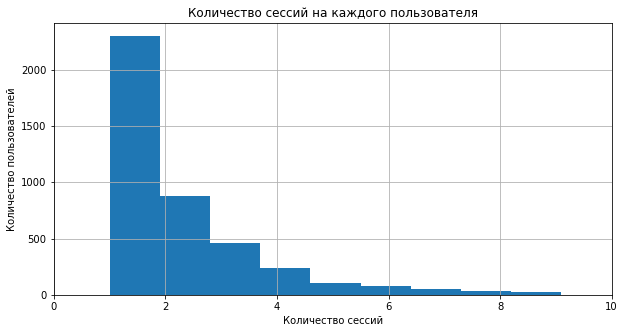

In [62]:
#построим гистрограмму распределения количества сессий на пользователя не учитывая выбросы
cs = count_sessions[count_sessions['session'] < 20]
cs.hist( bins=20,  grid=True, figsize=(10, 5));
plt.xlim(0, 10)
plt.title('Количество сессий на каждого пользователя');
plt.xlabel('Количество сессий');
plt.ylabel('Количество пользователей');

В данных представлена информация о 10368 сессий пользователей. У больше чем 50% клиентов была всего 1 сессия за рассматриваемый период. Лишь 25% пользователей заходили в приложение 3 и более раз. Так же стоит обратить внимание на наличие аномально большого количества сессий у одного клиента, рассмотрим подробнее какие события совершали такие пользователи.

In [63]:
#соеденим таблицу mobile_dataset с данными о количестве сессий у каждого клиента
count_sessions = mobile_dataset.merge(count_sessions, on='user.id', how='left')

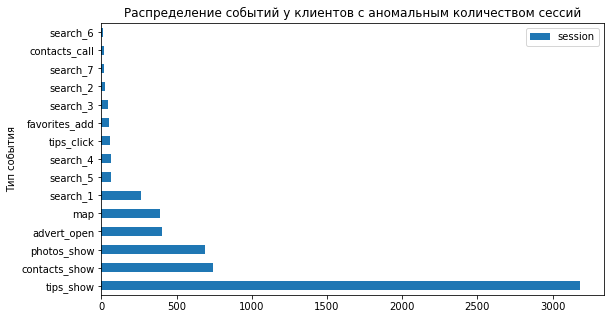

In [64]:
# посмотрим события лишь у тех клиентов, у который было более 20 сессий
(count_sessions
     .query('session > 20')
     .pivot_table(index='event.name', values='session', aggfunc='count')
     .sort_values('session', ascending=False)
     .plot(y='session', kind='barh', figsize=(9,5))
);

plt.title('Распределение событий у клиентов с аномальным количеством сессий');
plt.ylabel('Тип события');

Количество событий tips_show в три раза превышает другие события. Значит данные клиенты интересовались рекламными объявлениями.

##### Проанализируем длительность сессий.

Найдем продолжительность каждой сессии.

In [65]:
#сгруппируем данные по сессиям и найдем время начала и конца
duration = df.groupby('session').agg({'event.time': ['min', 'max']}).reset_index()
duration.columns = duration.columns.map(''.join)
duration.columns = ['session', 'start.time', 'finish.time']
#вычислим продолжительность сессии
duration['time_session'] = (duration['finish.time'] - duration['start.time']).dt.total_seconds().round(2)
duration

,session,start.time,finish.time,time_session
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595.73
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,507.39
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,899.27
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,758.17
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,1520.79
...,...,...,...,...
10363,10364,2019-11-02 01:16:48.947231,2019-11-02 01:16:48.947231,0.00
10364,10365,2019-11-02 18:01:27.094834,2019-11-02 18:17:41.386651,974.29
10365,10366,2019-11-02 19:25:53.794029,2019-11-02 19:30:50.471310,296.68
10366,10367,2019-11-03 14:32:55.956301,2019-11-03 14:48:44.263356,948.31


In [66]:
duration['time_session'].describe()

count    10368.000000
mean       772.672672
std       1191.611306
min          0.000000
25%         21.137500
50%        335.170000
75%       1045.392500
max      19318.300000
Name: time_session, dtype: float64

В среднем пользователи проводят 5-6 минут за одну сессию в приложении. Лишь 25% проводят за поиском более 17 минут. В данных есть выбросы как аномально маленькие(равные 0) так и аномально большие, равные нескольким часам. Посмотрим какие действия совершают пользователи в такие сессии.

In [67]:
#соеденим таблицу df с данными о продолжительности сессий у каждого клиента
duration = df.merge(duration, on='session', how='left')

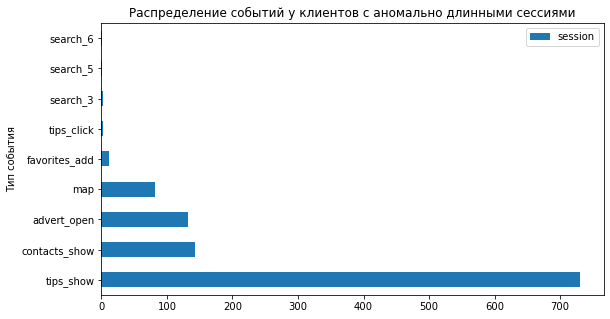

In [68]:
# посмотрим события лишь у тех клиентов, у которых длительность сессии более 10 тысяч секунд
(duration
     .query('time_session > 10000')
     .pivot_table(index='event.name', values='session', aggfunc='count')
     .sort_values('session', ascending=False)
     .plot(y='session', kind='barh', figsize=(9,5))
);

plt.title('Распределение событий у клиентов с аномально длинными сессиями');
plt.ylabel('Тип события');

Распределение аналогично ситуации с аномальным количеством сессий, почти в 7 раз количество событиий о выдаче рекламного объявления превышает остальные события. Посмотрим на другую аномалию, сессии с нулевой продолжительностью.

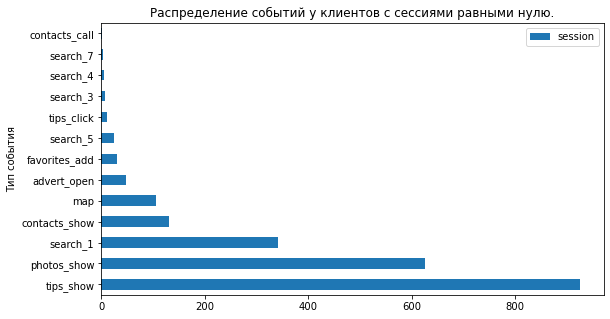

In [69]:
(duration
     .query('time_session < 1')
     .pivot_table(index='event.name', values='session', aggfunc='count')
     .sort_values('session', ascending=False)
     .plot(y='session', kind='barh', figsize=(9,5))
);

plt.title('Распределение событий у клиентов с сессиями равными нулю.');
plt.ylabel('Тип события');

Более 800 событий tips_show. Так же более 600 событий "просмотр фотографии". Возможно это технические проблемы, либо пользователь перешел в приложение через контекстную рекламу в поисковой системе, но объявление и приложение его не заинтересовало.

#### Частота совершения событий.

##### Общее количество событий по дням.

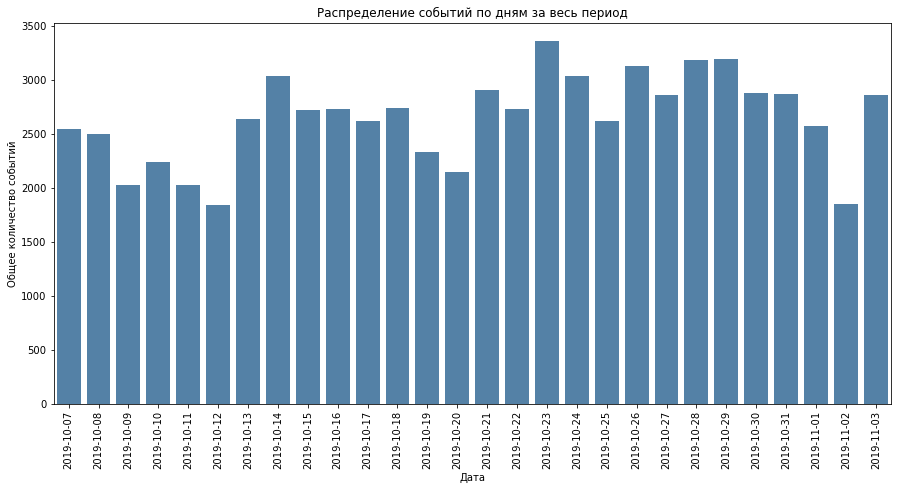

In [70]:
events = mobile_dataset.groupby('event.date')['event.name'].count().reset_index()

plt.figure(figsize = (15,7))
sns.barplot(x='event.date', y='event.name', data=events, color='steelblue')
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.ylabel('Общее количество событий')
plt.title('Распределение событий по дням за весь период')
plt.show()

На протяжении всего периода события распределены равномерно. Максимальное количество событий было 23 октября 2019 года, более 3300 событий, минимально 2 ноября, количество событий не превышает двух тысяч.

##### Общее количество событий по дням недели.

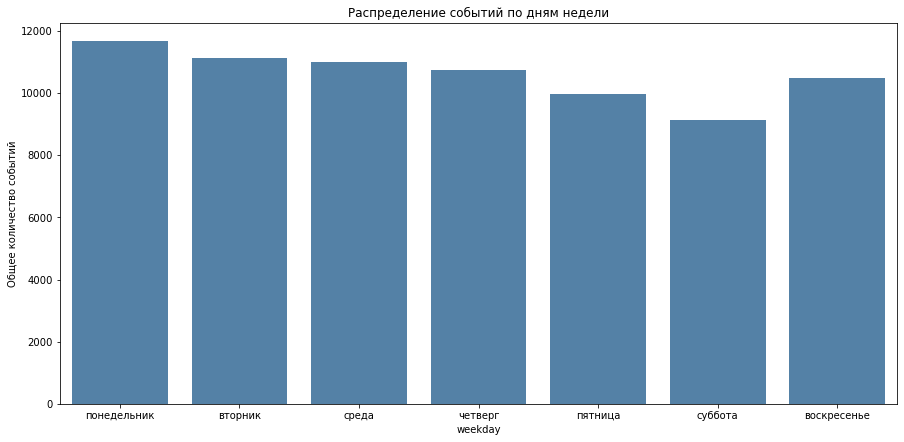

In [71]:
#сгруппируем данные по дню недели и посчитаем количество событий в каждый
w= mobile_dataset.groupby('weekday')['event.name'].count().reset_index()
#переименуем столбцы
w = w.replace([0, 1, 2, 3, 4, 5, 6], ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'])

plt.figure(figsize = (15,7))
sns.barplot(x='weekday', y='event.name', data=w, color='steelblue')
plt.xticks(rotation='horizontal')
plt.ylabel('Общее количество событий')
plt.title('Распределение событий по дням недели')
plt.show()



Понедельник можно считать самым активным днем пользования приложением, общее количество событий за рассматриваемый период почти 12 000. Далее активность пользователей снижается и становится минимальной в субботу, количество событий в этот день недели не превышает 10 000.

##### Распределение событий по типам за весь период.

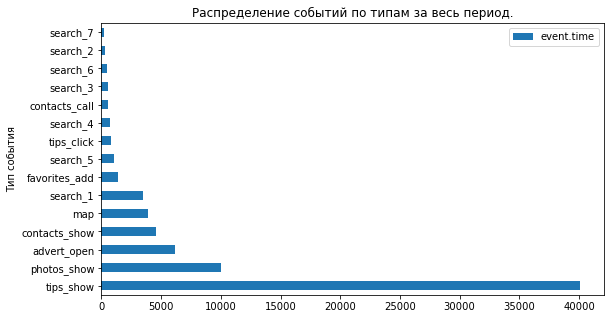

In [72]:
(mobile_dataset
            .groupby('event.name')[['event.time']].count()
            .sort_values('event.time', ascending=False)
            .plot(y='event.time', kind='barh', figsize=(9,5))
);

plt.title('Распределение событий по типам за весь период.');
plt.ylabel('Тип события');

Лидирующий тип событий за рассматриваемый период является tips_show - показ рекомендованный объявлений пользователю, более 50% событий. В топ-5  так же входят просмотр фотографий- 10 000, открытие карточки объявления- около 6 тысяч, просмотр контактов- почти 5 тысяч и просмотр карты около 4000. Пользователи неохотно добавляют объявление в избранное(всего 1,1%). Из 40 тысяч показов рекомендованных объявлений всего 814 кликов по ним. Либо технически есть возможность пропустить "клик по рекомендованному объявлению" и сразу перейти на просмотр контакта, либо алгоритм приложения подбирает не интересные пользователю объявления.

#### Конверсия в целевое действие- просмотр контактов (contacts_show).

In [73]:
#функция для расчета конверсии
def conversion(date, title):
    all_user = date['user.id'].nunique()
    target_date = date[date['event.name'] == 'contacts_show']
    target_user = target_date['user.id'].nunique()
    return  print(f'Конверсия в целевое действие просмотр контактов {title} равна: {target_user / all_user:.2%}')

In [74]:
conversion(mobile_dataset, '')

Конверсия в целевое действие просмотр контактов  равна: 22.85%


Выводы по общему поведению пользователей:

- Пользователи не пользуются приложением на постоянной основе, показатель удержания демонстрирует не стабильное уменьшение.  Клиенты теряют заинтересованность в поиске, либо просто забывают о своих намерениях. Стоит рассмотреть вопрос о возможности рассылки пуш-уведомлений с напоминанием о недавнем поиске определенного товара клиентам, которые не заходили какой-то период времени в приложение или добавили товары в избранное, но не перешли на карточку просмотра номера телефона.
- В среднем клиент использует приложение в течение  7-10 дней. Возможно недели достаточно для поиска и покупки необходимых вещей, стоит стимулировать клиентов на новые поиски за счет таргет объявлений.
- У более 50% клиентов была всего 1 сессия за рассматриваемый период. Лишь 25% пользователей заходили в приложение 3 и более раз. 
- Среднее время использования приложения 5-6 минут. Лишь 25% проводят за поиском более 17 минут.
- В данных есть сессии с нулевой продолжительностью.Более 800 событий tips_show. Так же более 600 событий "просмотр фотографии". Возможно пользователь перешел в приложение через контекстную рекламу в поисковой системе, но объявление и приложение его не заинтересовало. Либо это технические проблемы работы приложения, стоит проверить данную факт.
- Понедельник можно считать самым активным днем пользования приложением, общее количество событий за рассматриваемый период почти 12 000. Далее активность пользователей снижается и становится минимальной в субботу, количество событий в этот день недели не превышает 10 000.
- Лидирующий тип  tips_show - показ рекомендованный объявлений пользователю, более 50% событий. Так же в топ-5 входят: просмотр фотографий, открытие карточки объявления, просмотр контактов и просмотр карты. Пользователи не активно пользуются возможностью добавлять объявление в избранное. 
- Из 40 тысяч показов рекомендованных объявлений всего 814 кликов по ним. Либо технически есть возможность пропустить "клик по рекомендованному объявлению" и сразу перейти на просмотр контакта, либо алгоритм приложения подбирает не интересные пользователю объявления.
- Более 22 % пользователей переходят во вкладку просмотра контактов.

### Сегментация пользователей

Разделим наших пользователей на группы в зависимости от времени посещения мобильного приложения.

Такая сегментация поможет понять, как пользователи ведут себя в разное время суток и на основе этого можно будет выделить целевую аудиторию и планировать дальнешие рекламные кампании и направления развития бизнеса.
#### Разделим пользователей по сегментам.
Выделим 4 группы пользователей в зависимости от времени суток:

1. 07:00-13:00 Утро
2. 13:00-19:00 День
3. 19:00-01:00 Вечер
4. 01:00-07:00 Ночь

In [75]:
#функция для определения сегмента по часам сессии
def time_of_day(hour):
    if hour >= 7 and hour <= 12:
        return 'утро'
    elif hour > 12 and hour <= 18:
        return 'день' 
    elif hour > 18 and hour <= 24:
        return 'вечер'
    else:
        return 'ночь'

In [76]:
#применим функцию time_of_day для таблицы mobile_dataset
mobile_dataset['period'] = mobile_dataset['hour'].apply(time_of_day)

Некоторые пользователи пользовались приложением в разное время суток, найдем для каждого сегмент, в котором у него было наибольшее количество событий.

In [77]:
#по каждому user.id найдем количество событий в каждом сегменте(period)
segment = (
           mobile_dataset
               .groupby(['user.id', 'period'])['event.time'].count()
               .reset_index()
               .sort_values(['user.id', 'event.time'], ascending = False)
            )

In [78]:
#для каждого пользователя найдем сегмент с максимальным количеством событий в нем
segment = (
           segment
                 .groupby('user.id')
                 .agg({'period': 'first', 'event.time': 'first'})
                 .reset_index().sort_values('user.id', ascending = False)
           )
segment = segment.rename(columns={'period':'period.day'})
segment

,user.id,period.day,event.time
4292,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,день,226
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,утро,7
4290,ffcf50d9-293c-4254-8243-4890b030b238,утро,2
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,вечер,7
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,день,10
...,...,...,...
4,00551e79-152e-4441-9cf7-565d7eb04090,день,7
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,вечер,21
2,00463033-5717-4bf1-91b4-09183923b9df,день,10
1,00157779-810c-4498-9e05-a1e9e3cedf93,вечер,45


In [79]:
#посмотрим сколько в каждом периоде получилось уникальных пользователей
segment.groupby('period.day')['user.id'].nunique().reset_index()

,period.day,user.id
0,вечер,1339
1,день,1695
2,ночь,212
3,утро,1047


В результате у нас получилось 4 сегмента. Максимальное количество пользователей попали в Дневной период - 1695 человек. Минимальная группа - Ночные пользователи, их 212 человек.

#### Расчет Retention rate по сегментам

In [80]:
#Добавим столбец с сегментами в профили пользователей
profiles = profiles.merge(segment[['user.id', 'period.day']], on='user.id', how='left')

In [81]:
#Вызовем функцию get_retention по сегментам
retention_raw, retention = get_retention(
    profiles, mobile_dataset, dimensions=['period.day']
)

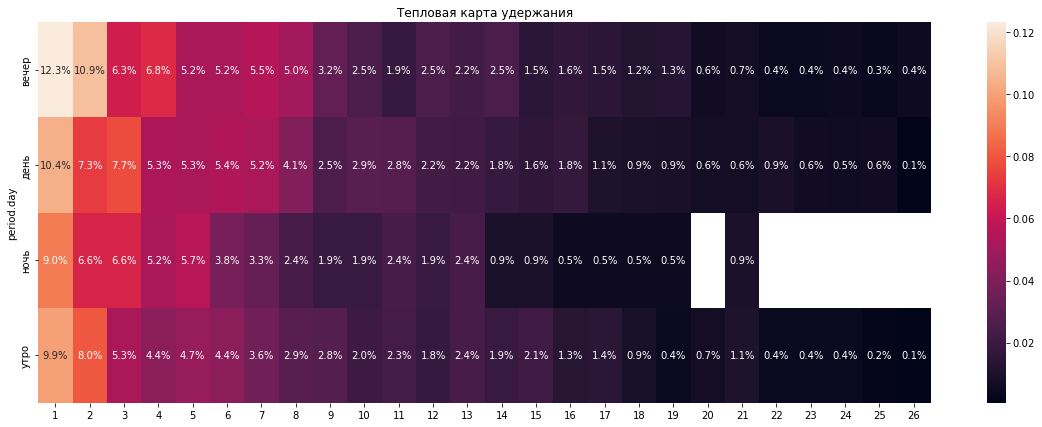

In [82]:
#Посмотрим тепловую карту
plt.figure(figsize=(20, 7))# задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.1%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика

plt.show()

Самый высокий процент удержания у вечерних пользователей, на второй день он равен 12.3%, а на 14 день использования  равен 2,5%. Удержание ночных пользователей самое низкое, уже к концу второй недели он  менее 1%. Пользователи сегмента Утро и День демонстрируют практически одинаковую динамику удержания, на второй день показатель равен 9,9% и 10.4% соответственно.

#### Рассчет конверсии в целевое действия для каждого сегмента.

In [83]:
#добавим столбец сегментации в таблицу mobile_dataset
mobile_dataset = mobile_dataset.merge(segment[['user.id', 'period.day']], on='user.id', how='left')

In [84]:
#воспользуемся функцией и рассчитаем конверсию для каждого сегмента
conversion(mobile_dataset[mobile_dataset['period.day'] == 'утро'], 'у сегмента "Утро"')
conversion(mobile_dataset[mobile_dataset['period.day'] == 'день'], 'у сегмента "День"')
conversion(mobile_dataset[mobile_dataset['period.day'] == 'вечер'], 'у сегмента "Вечер"')
conversion(mobile_dataset[mobile_dataset['period.day'] == 'ночь'], 'у сегмента "Ночь"')

Конверсия в целевое действие просмотр контактов у сегмента "Утро" равна: 23.59%
Конверсия в целевое действие просмотр контактов у сегмента "День" равна: 26.08%
Конверсия в целевое действие просмотр контактов у сегмента "Вечер" равна: 19.49%
Конверсия в целевое действие просмотр контактов у сегмента "Ночь" равна: 14.62%


Чаще всего переходят во вкладку просмотр номера телефона дневные клиенты, их конверсия равна 26%. Ночные клиенты реже просматривают контакты, всего 14,62%, что логично, ведь на ночные звонки реже возможно получить ответ. Для таких клиентов была бы удобна функция с вохможностью отправки сообщения продавцу. На основании коэффициента удержания и корреляции можно считать Дневных клиентов - целевым сегментом.

### Проверка гипотез.

Объединим таблицы mobile_dataset и mobile_sourсes.

In [85]:
information = mobile_dataset.merge(mobile_sourсes, on='user.id', how='left')

#### Гипотеза о равенстве конверсии в просмотры контактов у пользователей пришедших из разных источников.

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. 
Проверим, демонстрируют ли эти две группы  разную конверсию в просмотры контактов.

Сформулируем гипотезы.

**Нулевая**: Конверсиии групп Google и Yandex в просмотр контактов равны.

**Альтернативная**: Конверсии групп Google и Yandex в просмотр контактов различаются.

Уровень статистической значимости установим в размере 0.05.

In [86]:
#напишем функцию для посчета уникальных пользователей в каждом источнике
def trials_successes(date, sourсe):
    sourсes = date[date['source'] == sourсe]
    trials = sourсes['user.id'].nunique()
    show = sourсes[sourсes['event.name'] == 'contacts_show']
    successes = show['user.id'].nunique()
    return trials, successes

In [87]:
#общее количество уникальрных пользователей и кол-во пользователей перешедших в просмотр контакта из google
trials_google, successes_google = trials_successes(information, 'google')
#общее количество уникальрных пользователей и кол-во пользователей перешедших в просмотр контакта из yandex
trials_yandex, successes_yandex = trials_successes(information, 'yandex')

In [88]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([successes_google, successes_yandex])
trials = np.array([trials_google, trials_yandex])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
print(f'Средняя конверсия в просмотры контактов у пользователей, пришедших из yandex: {p2:.2%}')
print(f'Средняя конверсия в просмотры контактов у пользователей, пришедших из google: {p1:.2%}')     

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Средняя конверсия в просмотры контактов у пользователей, пришедших из yandex: 24.72%
Средняя конверсия в просмотры контактов у пользователей, пришедших из google: 24.36%


Нулевую гипотезу отвергнуть не удалось. Можно сделать вывод, что конверсии групп Google и Yandex в просмотр контактов не различаются.

#### Гипотеза о равенстве конверсии в просмотры контактов у пользователей, которые добавили объявление в избранное и нет.
Одни пользователи сначала добавляют объявления в избранные, другие сразу переходят  на просмотр номера телефона. Проверка гипотезы: две эти группы показывают разную конверсию в просмотры контактов.


Сформулируем гипотезы.

**Нулевая**: Конверсиии групп добавляющий объявление в избранное и не добавляющих в просмотр контактов равны.

**Альтернативная**: Конверсиии групп добавляющий объявление в избранное и не добавляющих в просмотр контактов различаются.

Уровень статистической значимости установим в размере 0.05.

In [89]:
#сгруппируем данные по сессиям и посчитаем количество действий по каждому событию, заменим пропуски на 0
favorites = df.pivot_table(index='session', columns='event.name', values='event.time',  aggfunc='count').fillna(0)

Подсчитаем размеры выборок, которые нужно сравнить.

In [90]:
#общее количество сессий поиска без добавление в избранное
trails_without_add = favorites.query('favorites_add == 0').shape[0]
#количество сессий поиска без добавления в избранное с переходом в просмотр контакта
successes_without_add = favorites.query('favorites_add == 0 and contacts_show > 0').shape[0]
#общее количество сессий поиска с добавление в избранное
trails_with_add = favorites.query('favorites_add > 0').shape[0]
#количество сессий поиска с добавления в избранное с переходом в просмотр контакта
successes_with_add = favorites.query('favorites_add > 0 and contacts_show > 0').shape[0]

In [91]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([successes_without_add, successes_with_add])
trials = np.array([trails_without_add, trails_with_add])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 
print(f'Средняя конверсия в просмотры контактов c добавлением объявления в избранное: {p2:.2%}')
print(f'Средняя конверсия в просмотры контактов без добавлением объявления в избранное: {p1:.2%}') 

p-значение:  0.00024057341373295849
Отвергаем нулевую гипотезу: между долями есть значимая разница
Средняя конверсия в просмотры контактов c добавлением объявления в избранное: 22.36%
Средняя конверсия в просмотры контактов без добавлением объявления в избранное: 16.12%


Гипотезу о равенстве конверсиий групп добавляющий объявление в избранное и не добавляющих в просмотр контактов отвергаем.
Средняя конверсия в просмотры контактов c добавлением объявления в избранное равна 22.36%, а без добавления 16.12%.

### Вывод.

В результате исследования можно сделать вывод:

1. В данных представлена информация о 4293 пользователях и о 74197 совершенных ими действиях в мобильном приложении.
2. Пользователи пользуются приложением неравномерно. Когда в один из дней приложением пользовалось мало клиентов, но на следующий день показатель удержания снова возрастал. Однозначно можно сказать, что такая тенденция не связана с днем недели (будни/выходной). Возможно клиент терял заинтересованность в поиске, либо просто забывают о своих намерениях. Стоит рассмотреть вопрос о возможности рассылки пуш-уведомлений с напоминанием о недавнем поиске определенного товара клиентам, которые не заходили какой-то период времени в приложение или добавили товары в избранное, но не перешли на карточку просмотра номера телефона. Так же можно сделать вывод, что после 7-10 дней пользователи меньше заходят в приложение, возможно недели достаточно для поиска и покупки необходимых вещей, стоит стимулировать клиентов на новые поиски за счет таргет объявлений.
3. В данных представлена информация о 10368 сессий пользователей. У больше чем 50% клиентов была всего 1 сессия за рассматриваемый период. Лишь 25% пользователей заходили в приложение 3 и более раз. Так же в данных есть аномально большое количества сессий у одного клиента. У таких пользователей в сессиях количество событий tips_show в три раза превышает другие события. Значит данные клиенты интересовались рекламными объявлениями.
5. В среднем пользователи проводят 5-6 минут за одну сессию в приложении. Лишь 25% проводят за поиском более 17 минут. В данных есть выбросы как аномально маленькие(равные 0) так и аномально большие, равные нескольким часам. В таких сессиях распределение аналогично ситуации с аномальным количеством сессий, почти в 7 раз количество событий о выдаче рекламного объявления превышает остальные события. В ситуациях, где сессии с нулевой продолжительностью более 800 событий tips_show. Так же более 600 событий "просмотр фотографии". Возможно это технические проблемы, либо пользователь перешел в приложение через контекстную рекламу в поисковой системе, но объявление и приложение его не заинтересовало.
8. На протяжении всего периода события распределены равномерно. Максимальное количество событий было 23 октября 2019 года, более 3300 событий, минимально 2 ноября, количество событий не превышает двух тысяч. Понедельник можно считать самым активным днем пользования приложением, общее количество событий за рассматриваемый период почти 12 000. Далее активность пользователей снижается и становится минимальной в субботу, количество событий в этот день недели не превышает 10 000.
9. Лидирующий тип событий за рассматриваемый период является tips_show - показ рекомендованный объявлений пользователю, более 50% событий. В топ-5  так же входят просмотр фотографий- 10 000, открытие карточки объявления- около 6 тысяч, просмотр контактов- почти 5 тысяч и просмотр карты около 4000. Пользователи неохотно добавляют объявление в избранное(всего 1,1%). Из 40 тысяч показов рекомендованных объявлений всего 814 кликов по ним. Либо технически есть возможность пропустить "клик по рекомендованному объявлению" и сразу перейти на просмотр контакта, либо алгоритм приложения подбирает не интересные пользователю объявления.
10. Более 22 % от общего числа пользователей переходят во вкладку просмотра контактов.
11. В ходе исследования ма разделили наших пользователей на группы в зависимости от времени суток посещения мобильного приложения:
- 07:00-13:00 **Утро**
- 13:00-19:00 **День**
- 19:00-01:00 **Вечер**
- 01:00-07:00 **Ночь**

12. В результате у нас получилось 4 сегмента. Максимальное количество пользователей попали в Дневной период - 1695 человек. Минимальная группа - Ночные пользователи, их 212 человек.
13. Самый высокий процент удержания у вечерних пользователей, на второй день он равен 12.3%, а на 14 день использования равен 2,5%. Удержание ночных пользователей самое низкое, уже к концу второй недели он менее 1%. Пользователи сегмента Утро и День демонстрируют практически одинаковую динамику удержания, на второй день показатель равен 9,9% и 10.4% соответственно.
14. Чаще всего переходят во вкладку просмотр номера телефона дневные клиенты, их конверсия равна 26%. Ночные клиенты реже просматривают контакты, всего 14,62%, что логично, ведь на ночные звонки реже возможно получить ответ. Для таких клиентов была бы удобна функция с возможностью отправки сообщения продавцу. На основании коэффициента удержания и корреляции можно считать Дневных клиентов - целевым сегментом.
15. На основе пользовательского опыта по сегментам рекомендуем:
- добавить возможность отправки продавцу сообщений, так как "ночные" пользователи редко просматривают контакты.
- отправку рекламных уведомлений  усилить на "дневных" пользователей, так как данный сегмент является целевым.
- в связи с низким показателем удержания  на 14 день по всем сегментам,  добавить рассылку напоминаний о последнем поиске объявления клиентам, которые так и не совершили целевое действие, через 7-10 дней после последнего действия в приложении.
16. Мы рассмотрели гипотезы:
- Нулевая гипотеза: Конверсии групп Google и Yandex в просмотр контактов равны.

Нулевую гипотезу отвергнуть не удалось. Конверсии групп Google и Yandex в просмотр контактов не различаются.
- Нулевая гипотеза: Конверсии групп, добавляющий объявление в избранное и не добавляющих в просмотр контактов равны.

Нулевую гипотезу отвергаем.Средняя конверсия в просмотры контактов c добавлением объявления в избранное равна 22.36%, а без добавления 16.12%.
